# Analisis Electrical Energy Output pada Combined Cycle Power Plant

### Disusun oleh : Mutiah Kurniasih Fitriyani

Project ini bertujuan untuk menganalisis Electrical Energy Output pada Combined Cycle Power Plant.

Pertanyaan yang akan dijawab melalui analisis ini adalah:

- Feature apa yang paling berpengaruh terhadap Electrical Energy Output pada Combined Cycle Power Plant?
- Model regresi apa yang paling akurat untuk memodelkan korelasi antara feature tersebut dengan Electrical Energy Output?
- Berapa jumlah cluster terbaik untuk featuretersebut terhadap Electrical Energy Output?

Sumber data dari https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant.
    

Pertama yang dilakukan adalah install modul yang akan digunakan.

In [1]:
!pip install yellowbrick

    100% |████████████████████████████████| 286kB 19.7MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Langkah selanjutnya mengimport semua modul yang akan digunakan.

In [2]:
import s3fs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from yellowbrick.cluster import KElbowVisualizer

Kemudian, meload data dari file data set Folds5x2_pp.xlsx. 

In [3]:
s3=s3fs.S3FileSystem()

with s3.open('s3://dts-fga-bd-302/Folds5x2_pp.xlsx', 'rb') as f:
    data = pd.read_excel(f)

data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


Dataset Combined Cycle Power Plant ini diambil pada tahun 2006 hingga tahun 2011. Dataset tersebut memiliki 9568 baris dan 5 kolom. Kolom-kolom tersebut merepresentasikan feature dari dataset Combined Cycle Power Plant, yaitu sebagai berikut:

- AT adalah rata-rata ambient temperature per jam (derajat Celcius).
- V adalah exhaust vacuum (cmHg).
- AP adalah ambient pressure (milibar).
- RH adalah realtive humidity (persen).
- PE adalah electrical energy output (MW).


## Missing Values

Selanjutnya, akan di cek apakah ada missing values pada dataset Combined Cycle Power Plant.

In [4]:
data[data['AT'].isnull()]
data[data['V'].isnull()]
data[data['AP'].isnull()]
data[data['RH'].isnull()]
data[data['PE'].isnull()]

,AT,V,AP,RH,PE


Dapat disimpulkan bahwa dataset Combined Cycle Power Plant tidak memiliki missing values.

## Scatter Plot 

Selanjutnya akan ditampikan scatter plot dari masing-masing feature dataset Combined Cycle Power Plant. 

### 1. Scatter Plot dari feature Ambient Temperature dengan feature Electrical Energy Output.

Berikut ini adalah Scatter Plot dari feature Ambient Temperature dengan feature Electrical Energy Output.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


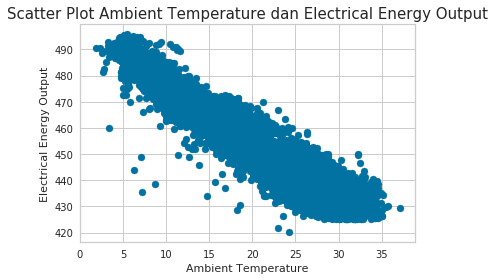

In [5]:
plt.scatter(data['AT'],data['PE'])
plt.title('Scatter Plot Ambient Temperature dan Electrical Energy Output', fontsize=15)
plt.xlabel('Ambient Temperature')
plt.ylabel('Electrical Energy Output')
plt.show()

### 2. Scatter Plot dari feature Exhaust Vacuum dengan feature Electrical Energy Output

Berikut ini adalah Scatter Plot dari feature Exhaust Vacuum dengan feature Electrical Energy Output.

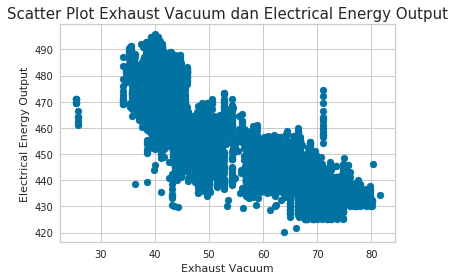

In [6]:
plt.scatter(data['V'],data['PE'])
plt.title('Scatter Plot Exhaust Vacuum dan Electrical Energy Output', fontsize=15)
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Electrical Energy Output')
plt.show()

### 3. Scatter Plot dari feature Ambient Pressure dengan feature Electrical Energy Output

Berikut ini adalah Scatter Plot dari feature Ambient Pressure dengan feature Electrical Energy Output.

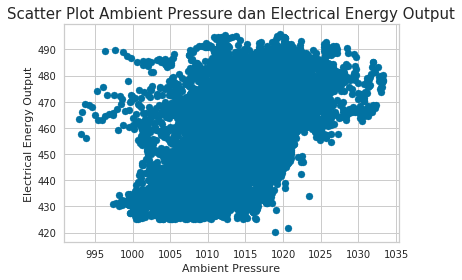

In [7]:
plt.scatter(data['AP'],data['PE'])
plt.title('Scatter Plot Ambient Pressure dan Electrical Energy Output', fontsize=15)
plt.xlabel('Ambient Pressure')
plt.ylabel('Electrical Energy Output')
plt.show()

### 4. Scatter Plot dari feature Relative Humidity dengan feature Electrical Energy Output

Berikut ini adalah Scatter Plot dari feature Relative Humidity dengan feature Electrical Energy Output.

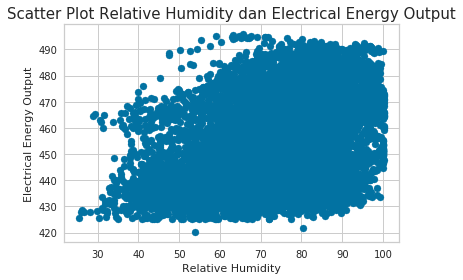

In [8]:
plt.scatter(data['RH'],data['PE'])
plt.title('Scatter Plot Relative Humidity dan Electrical Energy Output', fontsize=15)
plt.xlabel('Relative Humidity')
plt.ylabel('Electrical Energy Output')
plt.show()

### 5. Scatter Plot dari feature Ambient Temperature dengan feature Relative Humidity

Berikut ini adalah Scatter Plot dari feature Ambient Temperature dengan Relative Humidity.

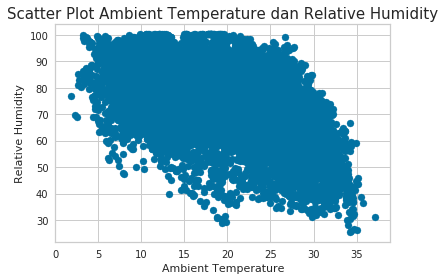

In [9]:
plt.scatter(data['AT'],data['RH'])
plt.title('Scatter Plot Ambient Temperature dan Relative Humidity', fontsize=15)
plt.xlabel('Ambient Temperature')
plt.ylabel('Relative Humidity')
plt.show()

### 6. Scatter Plot dari feature Exhaust Vacuum dengan feature Relative Humidity

Berikut ini adalah Scatter Plot dari feature Exhaust Vacuum dengan Relative Humidity.

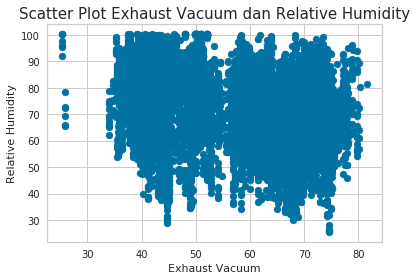

In [10]:
plt.scatter(data['V'],data['RH'])
plt.title('Scatter Plot Exhaust Vacuum dan Relative Humidity', fontsize=15)
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Relative Humidity')
plt.show()

### 7. Scatter Plot dari feature Ambient Pressure dengan feature Relative Humidity

Berikut ini adalah Scatter Plot dari feature Ambient Pressure dengan Relative Humidity.

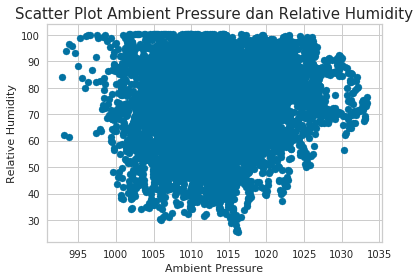

In [11]:
plt.scatter(data['AP'],data['RH'])
plt.title('Scatter Plot Ambient Pressure dan Relative Humidity', fontsize=15)
plt.xlabel('Ambient Pressure')
plt.ylabel('Relative Humidity')
plt.show()

### 8. Scatter Plot dari feature Ambient Temperature denga feature Ambient Pressure

Berikut ini adalah Scatter Plot dari feature Ambient Temperature dengan Ambient Pressure.

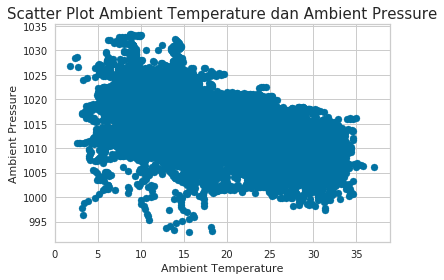

In [12]:
plt.scatter(data['AT'],data['AP'])
plt.title('Scatter Plot Ambient Temperature dan Ambient Pressure', fontsize=15)
plt.xlabel('Ambient Temperature')
plt.ylabel('Ambient Pressure')
plt.show()

### 9. Scatter Plot dari feature Exhaust Vacuum dengan feature Ambient Pressure

Berikut ini adalah Scatter Plot dari feature Exhaust Vacuum dengan Ambient Pressure.

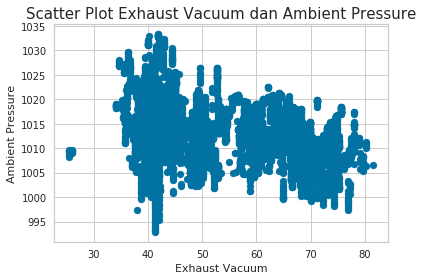

In [13]:
plt.scatter(data['V'],data['AP'])
plt.title('Scatter Plot Exhaust Vacuum dan Ambient Pressure', fontsize=15)
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Ambient Pressure')
plt.show()

### 10. Scatter Plot dari feature Ambient Temperature dengan feature Exhaust Vacuum

Berikut ini adalah Scatter Plot dari feature Ambient Temperature dengan Exhaust Vacuum.

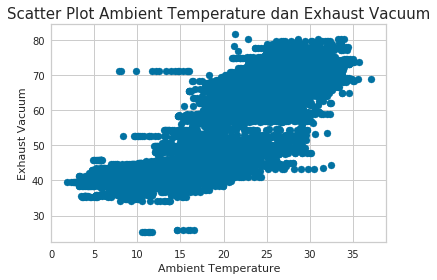

In [14]:
plt.scatter(data['AT'],data['V'])
plt.title('Scatter Plot Ambient Temperature dan Exhaust Vacuum', fontsize=15)
plt.xlabel('Ambient Temperature')
plt.ylabel('Exhaust Vacuum')
plt.show()

##  Feature yang memiliki dugaan kuat korelasi

Dari scatter plot masing-masing feature tersebut, dipilih feature Ambient Temperature dan feature Electrical Energy Output yang diduga memiliki korelasi paling kuat. Karena dari scatter plot kedua feature tersebut terlihat bahwa scatter plot tersebut memiliki korelasi negatif yang terlihat dari semakin tinggi nilai Ambient Temperature maka semakin rendah nilai Electrical Energy Output. Serta memiliki sebaran data yang paling mendekati garis linear.

Kemudian dicek apakah benar feature Ambient Temperature dan feature Electrical Energy Output memiliki korelasi yang paling kuat dengan menggunakan Korelasi Pearson. 
Berikut ini ditampilkan koefisien korelasi pearson dari dataset Combined Cycle Power Plant.

In [50]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


Terlihat bahwa Korelasi Pearson terkuat adalah korelasi antara Ambient Temperature dan Electrical Energy Output. Jadi, dapat disimpulkan bahwa feature yang paling berpengaruh terhadap Electrical Energy Output adalah Ambient Temperature.

## Statistik Deskriptif

Selanjutnya, dihitung jumlah data, rata-rata,standar deviasi, nilai minimum, kuartil bawah, kuartil atas dan nilai maksimum dari feature Ambient Temperature dan feature Electrical Energy Output dalam dataset Combined Cycle Power Plant.

Pertama, dihitung jumlah data, rata-rata,standar deviasi, nilai minimum, kuartil bawah, kuartil atas dan nilai maksimum dari feature Ambient Temperature dalam dataset Combined Cycle Power Plant.

In [15]:
data['AT'].describe()

count    9568.000000
mean       19.651231
std         7.452473
min         1.810000
25%        13.510000
50%        20.345000
75%        25.720000
max        37.110000
Name: AT, dtype: float64

Berdasarkan data diatas, pada feature Ambient Temperature diperoleh jumlah data 9568, rata-rata 19.651231,standar deviasi 7.452473, nilai minimum 1.81, kuartil bawah 13.51, kuartil atas 25.72 dan nilai maksimum 37.11.

Selanjutnya, dihitung jumlah data, rata-rata,standar deviasi, nilai minimum, kuartil bawah, kuartil atas dan nilai maksimum dari feature Electrical Energy Output dalam dataset Combined Cycle Power Plant.

In [16]:
data['PE'].describe()

count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%       468.430000
max       495.760000
Name: PE, dtype: float64

Berdasarkan data diatas, pada feature Electrical Energy Output diperoleh jumlah data 9568, rata-rata 454.356,standar deviasi 17.066995, nilai minimum 420.26, kuartil bawah 439.75, kuartil atas 468.43 dan nilai maksimum 495.76.

Kemudian, ditampilkan histogram dari feature Ambient Temperature.

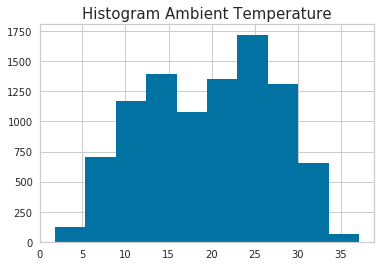

In [17]:
plt.hist(data['AT'])
plt.title('Histogram Ambient Temperature', fontsize=15)
plt.show()

Dari Histogram Ambient Temperature diatas terlihat bahwa frekuensi terbanyak data Ambient Temperature ada di sekitar 25 derajat Celcius. 

Selanjutnya, ditampilkan histogram dari feature Electrical Energy Output.

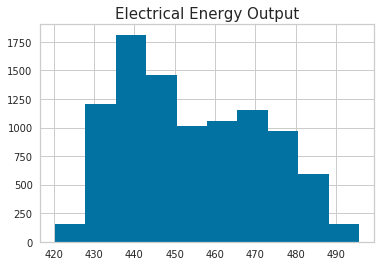

In [18]:
plt.hist(data['PE'])
plt.title('Electrical Energy Output', fontsize=15)
plt.show()

Dari Histogram Electrical Energy Output diatas terlihat bahwa frekuensi terbanyak dari data Electrical Energy Output ada di sekitar 440 MW. 

## Analisis Regresi

Pertama, dilakukan normalisasi feature Ambient Temperature dan feature Electrical Energy Output.

In [19]:
x_data, y_data = (data['AT'].values, data['PE'].values)

xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Selanjutnya, dibuat train dan test dataset dari feature Ambient Temperature dan feature Electrical Energy Output.

In [20]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk] 

Akan dibandingkan model regresi linear dan model regresi nonlinear yang paling akurat untuk dataset tersebut.

### Model Regresi Linear

Pertama, data train yang telah dibuat tadi dimodelkan dengan menggunakan Regresi Linear.

In [21]:
# modelling data train use linear Regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['AT']])
train_y = np.asanyarray(train[['PE']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-2.17199669]]
Intercept:  [497.0598112]


Selanjutnya, fit line dari model regresi linear diatas di plot pada data tersebut.

Text(0, 0.5, 'Electrical Energy Output')

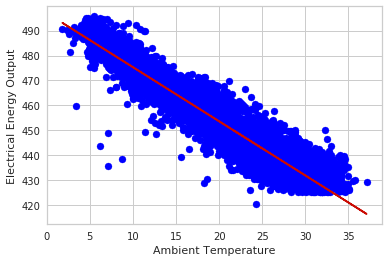

In [22]:
plt.scatter(train.AT, train.PE,  color='blue')                    
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Ambient Temperature")
plt.ylabel("Electrical Energy Output")

Kemudian, dihitung Mean Absolute Error, MSE, dan R-2 score dari model regresi linear diatas. 

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['AT']])
test_y = np.asanyarray(test[['PE']])
test_y_ = regr.predict(test_x)

print("Model Regresi Linear")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Model Regresi Linear
Mean absolute error: 4.29
Residual sum of squares (MSE): 29.53
R2-score: 0.89


### Model Regresi Nonlinear

Selanjutnya, data train yang telah dibuat tadi dimodelkan dengan model regresi nonlinear. Model regresi linear yang akan diterapkan adalah sigmoid, eksponensial, dan polinomial.

Pertama, dibuat function dari model regresi nonlinear sigmoid, eksponensial, dan polinomial.

In [24]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

def eksponensial(x, Beta_1, Beta_2):
     y = Beta_1*np.exp(Beta_2*x)
     return y

def polinomial(x, Beta_0, Beta_1, Beta_2, Beta_3):
     y = Beta_0+Beta_1*x+Beta_2*(x**2)+Beta_3*(x**3)
     return y

Kemudian, dihitung parameter dari model regresi nonlinear sigmoid, eksponensial, dan polinomial diatas.

In [25]:
from scipy.optimize import curve_fit
popts, pcovs = curve_fit(sigmoid, xdata, ydata, maxfev=10000)
#print the final parameters
print("Sigmoid beta_1 = %f, beta_2 = %f" % (popts[0], popts[1]))

from scipy.optimize import curve_fit
popt, pcov = curve_fit(eksponensial, xdata, ydata, maxfev=10000)
#print the final parameters
print("Eksponensial beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

from scipy.optimize import curve_fit
poptp, pcovp = curve_fit(polinomial, xdata, ydata, maxfev=10000)
#print the final parameters
print("Polinomial beta_0 = %f, beta_1 = %f, beta_2 = %f, beta_3 = %f" % (poptp[0], poptp[1],poptp[2], poptp[3]))

Sigmoid beta_1 = 0.000006, beta_2 = -420991.230806
Eksponensial beta_1 = 1.006142, beta_2 = -0.177421
Polinomial beta_0 = 0.993884, beta_1 = -0.045687, beta_2 = -0.347616, beta_3 = 0.275741


Fit line dari model regresi non linear sigmoid, eksponensial, dan polinomial, di plot pada data tersebut. 

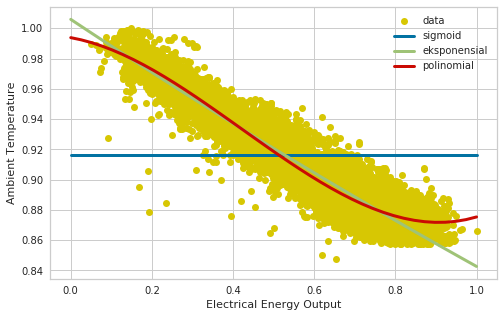

In [49]:
x = np.linspace(0, 20, 40)
x = x/max(x)
plt.figure(figsize=(8,5))
y1 = sigmoid(x, *popts)
y2 = eksponensial(x, *popt)
y3 = polinomial(x, *poptp)
plt.plot(xdata, ydata,'yo', label='data')
plt.plot(x,y1, linewidth=3.0, label='sigmoid')
plt.plot(x,y2, linewidth=3.0, label='eksponensial')
plt.plot(x,y3, linewidth=3.0, label='polinomial')
plt.legend(loc='best')
plt.ylabel('Ambient Temperature')
plt.xlabel('Electrical Energy Output')
plt.show()

Setelah itu, dihitung Mean absolute error, MSE, dan R2-score dari model regresi nonlinear sigmoid, eksponensial, dan polinomial diatas.

In [27]:
# write your code here
# split data into train/test
msk = np.random.rand(len(data)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popts, pcovs = curve_fit(sigmoid, train_x, train_y, maxfev=10000)
popt, pcov = curve_fit(eksponensial, train_x, train_y, maxfev=10000)
poptp, pcovp = curve_fit(polinomial, train_x, train_y, maxfev=10000)

# predict using test set
y_hat1 = sigmoid(test_x, *popts)
y_hat2 = eksponensial(test_x, *popt)
y_hat3 = polinomial(test_x, *poptp)

# evaluation
print("Sigmoid")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat1 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat1 , test_y) )
print("Eksponensial")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat2 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat2 , test_y) )
print("Polinomial")
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat3 - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat3 , test_y) )


Sigmoid
Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: -155208267882.27
Eksponensial
Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 0.90
Polinomial
Mean absolute error: 0.01
Residual sum of squares (MSE): 0.00
R2-score: 0.91


Model regresi yang paling akurat untuk Ambient Temperature dan Electricity Energy Output adalah model regresi nonlinear polinomial karena R-2 Score model tersebut paling tinggi dibandingkan dengan model regresi yang lain yaitu 0.91.

## Analisis Clustering

Clustering yang akan digunakan pada dataset Combined Cycle Power Plant adalah K-means Clustering. K-means Clustering akan diterapkan pada feature Ambient Temperature dan feature Electrical Energy Output.

Pertama, akan dihitung centroid dari K-means Clustering dengan K=3.

In [28]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
X=data[['AT','PE']]
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Get the cluster centroids
print(kmeans.cluster_centers_)

[[ 26.41797307 438.51370095]
 [ 17.59696724 458.57948926]
 [ 10.0260033  477.61301817]]


Berikut ini adalah centroid terdekat setiap data.

In [29]:
# Get the cluster labels
print(kmeans.labels_)

[1 0 2 ... 0 0 1]


Selanjutnya, centroid diplot pada data.

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


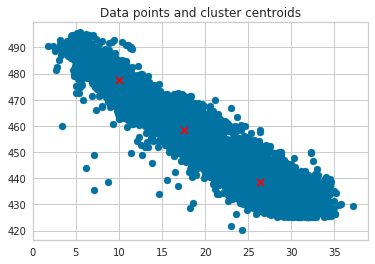

In [30]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X['AT'], X['PE'])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

K-means clustering dievaluasi untuk menentukan cluster terbaik. Pertama, dihitung silhouette score dari cluster tersebut.

In [31]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.5437011420854797


Setelah itu, menampilkan visualisasi dari jumlah cluster yang akan menghasilkan clustering terbaik. 

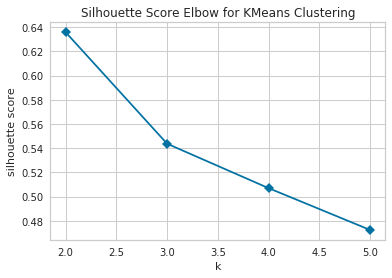

In [32]:
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof() 

Dari grafik di atas, jumlah cluster terbaik untuk K-means Clustering pada feature Ambient Temperature dan feature Electricity Energy Output adalah 2 cluster.

## Kesimpulan 

1. Feature apa yang paling berpengaruh terhadap Electrical Energy Output pada Combined Cycle Power Plant adalah Ambient Temperature.
2. Model regresi linear adalah model regresi linear yang paling akurat untuk memodelkan korelasi antara Ambient Temperature dengan Electrical Energy Output.
3. Jumlah cluster terbaik untuk Ambient Temperature terhadap Electrical Energy Output adalah 2 cluster.